# 2D Ising model: Exact solution

References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [1]:
import numpy as np
import pyuni10 as uni10
import matplotlib.pyplot as plt

In [2]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

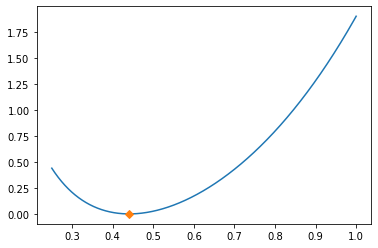

In [3]:
K = np.linspace(1/4, 1/1, 1000)

fig, ax = plt.subplots()

ax.plot(K, np.sinh(2*K)+1/np.sinh(2*K)-2)
ax.plot(Kc, 0, 'D')

In [4]:
# c_r and its derivatives
def c(r, K, n):
    return (np.cosh(2*K)**2)/np.sinh(2*K)-np.cos(np.pi*r/n)

def d_c(K):
    return 2*np.cosh(2*K)*(1-1/(np.sinh(2*K)**2))

def dd_c(K):
    return 8*(np.cosh(2*K)**2)/(np.sinh(2*K)**3) + 4*(np.sinh(2*K) - 1/np.sinh(2*K))

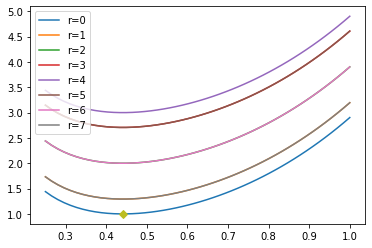

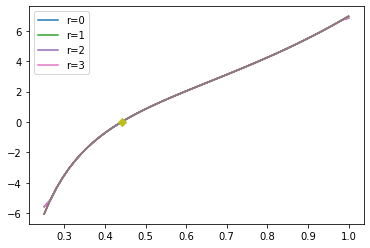

In [5]:
K = np.linspace(1/4, 1/1)
n = 4

fig, ax = plt.subplots()
for r in range(2*n):
    ax.plot(K, c(r, K, n), label='r={}'.format(r))
ax.plot(Kc, 1, 'D')
ax.legend()

fig, ax = plt.subplots()
for r in range(n):
    ax.plot(K, np.gradient(c(r, K, n),K), label='r={}'.format(r))
    ax.plot(K, d_c(K))
ax.plot(Kc, 0, 'D')
ax.legend()

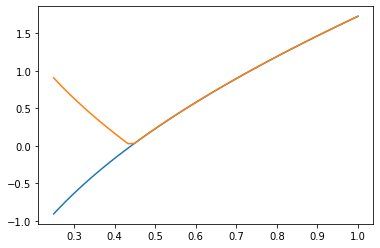

In [6]:
K = np.linspace(1/4, 1/1)

c0 = c(0,K,1)
fig, ax = plt.subplots()

# ax.plot(K, 2*K)
# ax.plot(K, np.log(np.tanh(K)))
ax.plot(K, 2*K + np.log(np.tanh(K)))
ax.plot(K, np.log(c0+np.sqrt(c0*c0-1)))
# ax.plot(K, -np.log(c0+np.sqrt(c0*c0-1)))

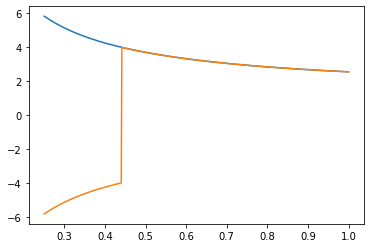

In [7]:
K = np.linspace(1/4, 1/1,1000)

c0 = c(0,K,1)
fig, ax = plt.subplots()

ax.plot(K, np.gradient(2*K + np.log(np.tanh(K)),K))
ax.plot(K, np.gradient(np.log(c0+np.sqrt(c0*c0-1)),K))

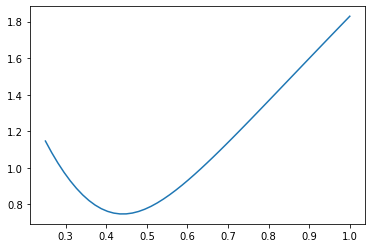

In [8]:
K = np.linspace(1/4, 1/1)

c1 = c(1,K,4)
fig, ax = plt.subplots()

ax.plot(K, np.log(c1+np.sqrt(c1*c1-1)))
# ax.plot(K, -np.log(c0+np.sqrt(c0*c0-1)))

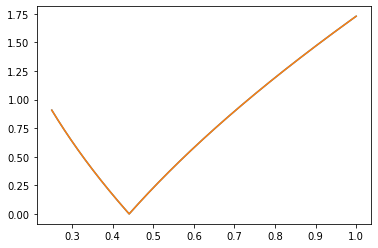

In [9]:
K = np.linspace(1/4, 1/1, 1000)

fig, ax = plt.subplots()

# ax.plot( np.cosh(2*K)/np.tanh(2*K) -1 )
# ax.plot( (np.cosh(2*K)**2)/np.sinh(2*K) -1)

c = (np.cosh(2*K)**2)/np.sinh(2*K) -1
ax.plot(K, np.arccosh(c) )
ax.plot(K, np.log(c + np.sqrt(c*c-1)))

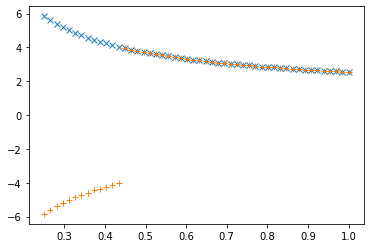

In [10]:
K = np.linspace(1/4, 1/1)

c = (np.cosh(2*K)**2)/np.sinh(2*K) -1
dc = 2*np.cosh(2*K)*(1-1/np.sinh(2*K)**2)

fig, ax = plt.subplots()

ax.plot(K, 2*(1 + 1/np.sinh(2*K)), 'x' )
ax.plot(K, dc/np.sqrt(c*c-1), '+' )

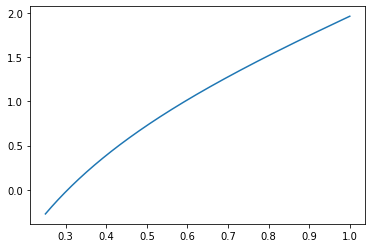

In [11]:
K = np.linspace(1/4, 1/1, 1000)

fig, ax = plt.subplots()

ax.plot(K, 2*K + np.log(np.tanh(2*K)))

## Second version

In [12]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))

### $c$

In [13]:
# c_r and its derivatives
def c(r, K, n):
    return (np.cosh(2*K)**2)/np.sinh(2*K)-np.cos(np.pi*r/n)

def d_c(K):
    return 2*np.cosh(2*K)*(1-1/(np.sinh(2*K)**2))

def dd_c(K):
    return 8*(np.cosh(2*K)**2)/(np.sinh(2*K)**3) + 4*(np.sinh(2*K) - 1/np.sinh(2*K))

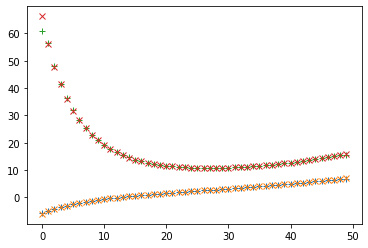

In [14]:
# check c, d_c, dd_c
r = 0
n = 1
K = np.linspace(1/4, 1/1)

fig, ax = plt.subplots()
# ax.plot(c(r, K, n))

ax.plot(np.gradient(c(r, K, n), K), '+')
ax.plot(d_c(K),'x')

ax.plot(np.gradient(d_c(K), K), '+')
ax.plot(dd_c(K),'x')


### $ \gamma $

In [15]:
# gamma

def eval_gamma(K, n):
    gamma = np.zeros(2*n)
#     gamma[0] = 2*K + np.log(np.tanh(K))
    for r in range(0, 2*n):
        gamma[r] = np.arccosh(c(r, K, n))
    return gamma

def eval_d_gamma(K, n):
    d_gamma = np.zeros(2*n)
#     d_gamma[0] = 2 + 1/(np.tanh(K)*np.cosh(K)*np.cosh(K)) # checked
    d_gamma[0] = 2*(1.0 + 1.0/np.sinh(2*K)) # checked
    for r in range(1, 2*n):
#         d_gamma[r] = np.cosh(2*K)*( 4-2/(np.tanh(2*K)**2) )/np.sqrt(c(r, K, n)**2 - 1) # checked
#         d_gamma[r] = d_c(K) /np.sqrt(c(r, K, n)**2 - 1) # checked
        d_gamma[r] = d_c(K) * (c(r, K, n)**2 - 1)**(-1/2) # checked
    return d_gamma

def eval_dd_gamma(K, n):
    dd_gamma = np.zeros(2*n)
    dd_gamma[0] = -4*np.cosh(2*K)/(np.sinh(2*K)**2)
    for r in range(1, 2*n):
        dd_gamma[r] = dd_c(K) * (c(r, K, n)**2 - 1)**(-0.5) - c(r, K, n)*(d_c(K)**2) * (c(r, K, n)**2 - 1)**(-3/2)
    return dd_gamma

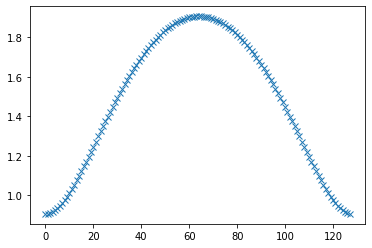

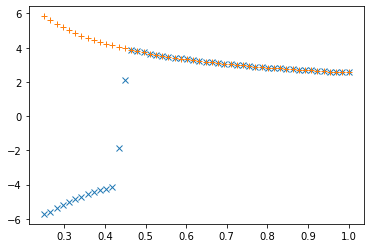

In [16]:
n = 64

K = np.linspace(1/4, 1/1)
gamma = np.zeros(shape=(len(K),2*n))
d_gamma = np.zeros_like(gamma)
dd_gamma = np.zeros_like(gamma)

for i, k in enumerate(K):
#     print(i,k)
    gamma[i, :] = eval_gamma(k, n)
    d_gamma[i, :] = eval_d_gamma(k, n)
    dd_gamma[i, :] = eval_dd_gamma(k, n)

fig, ax = plt.subplots()
ax.plot(gamma[0, :],'x')

fig, ax = plt.subplots()

# for r in range(n):
#     ax.plot(np.gradient(gamma[:,r],K),'x')
#     ax.plot(d_gamma[:,r],'+')

#     ax.plot(np.gradient(d_gamma[:,r],K),'x')
#     ax.plot(dd_gamma[:,r],'+')
# r = 0
# ax.plot(K,gamma[:,r])

r = 0
ax.plot(K, np.gradient(gamma[:,r],K),'x')
ax.plot(K, d_gamma[:,r],'+')

r = 16
# ax.plot(K,  np.gradient(gamma[:,r],K),'x')
# ax.plot(K, d_gamma[:,r],'+')


### Z1, Z2, Z3, Z4

In [17]:
# Z1, Z2, Z3, Z4
def eval_Z1(K, n, m, gamma):
    Z1 = 1.0
    for r in range(n):
        Z1 = Z1*2*np.cosh(m*gamma[2*r+1]/2)
    return Z1

def eval_Z2(K, n, m, gamma):
    Z2 = 1.0
    for r in range(n):
        Z2 = Z2*2*np.sinh(m*gamma[2*r+1]/2)
    return Z2

def eval_Z3(K, n, m, gamma):
    Z3 = 1.0
    for r in range(n):
        Z3 = Z3*2*np.cosh(m*gamma[2*r]/2)
    return Z3

def eval_Z4(K, n, m, gamma):
    Z4 = 1.0
    for r in range(n):
        Z4 = Z4*2*np.sinh(m*gamma[2*r]/2)
    return Z4

[0.90682911 1.28168071 1.74133851 1.90682911 1.74133851 1.28168071]
[0.81934327 1.22878724 1.70998185 1.88056776 1.70998185 1.22878724]
[0.73533289 1.18131187 1.68262072 1.85778187 1.68262072 1.18131187]
[0.65444203 1.13900659 1.65888491 1.8381155  1.65888491 1.13900659]
[0.5763683  1.10166868 1.63845669 1.82126626 1.63845669 1.10166868]
[0.50085257 1.06912611 1.62106058 1.80697501 1.62106058 1.06912611]
[0.42767103 1.04122518 1.60645546 1.79501797 1.60645546 1.04122518]
[0.356629   1.01782011 1.59442852 1.78520043 1.59442852 1.01782011]
[0.28755601 0.99876455 1.58479046 1.77735193 1.58479046 0.99876455]
[0.22030191 0.98390495 1.57737172 1.77132232 1.57737172 0.98390495]
[0.1547337  0.97307613 1.57201947 1.7669786  1.57201947 0.97307613]
[0.09073297 0.96609878 1.56859518 1.76420236 1.56859518 0.96609878]
[0.02819381 0.96277908 1.56697269 1.76288769 1.56697269 0.96277908]
[0.03297893 0.96290993 1.56703656 1.76293944 1.56703656 0.96290993]
[0.09287111 0.96627371 1.5686808  1.76427174 1.5

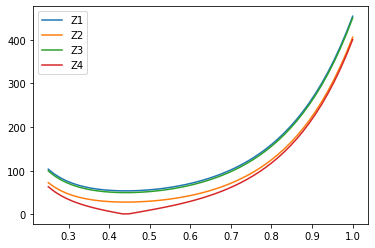

In [18]:
n = 3
m = 2
K = np.linspace(1/4, 1/1)

Z1 = np.zeros_like(K)
Z2 = np.zeros_like(K)
Z3 = np.zeros_like(K)
Z4 = np.zeros_like(K)

for i, k in enumerate(K):
    gamma = eval_gamma(k, n)
    print(gamma)
    Z1[i] = eval_Z1(k, n, m, gamma)
    Z2[i] = eval_Z2(k, n, m, gamma)
    Z3[i] = eval_Z3(k, n, m, gamma)
    Z4[i] = eval_Z4(k, n, m, gamma)
    
fig, ax = plt.subplots()
ax.plot(K,Z1,label='Z1')
ax.plot(K,Z2,label='Z2')
ax.plot(K,Z3,label='Z3')
ax.plot(K,Z4,label='Z4')
ax.legend()

### Z2/Z1, Z3/Z1, Z4/Z1

In [19]:
# ratio Z2/Z1, Z3/Z1, Z4/Z1
def eval_Z2_over_Z1(K, n, m, gamma):
    Z2_over_Z1 = 1.0
    for r in range(n):
        Z2_over_Z1 = Z2_over_Z1 * np.sinh(m*gamma[2*r+1]/2) / np.cosh(m*gamma[2*r+1]/2)
    return Z2_over_Z1

def eval_Z3_over_Z1(K, n, m, gamma):
    Z3_over_Z1 = 1.0
    for r in range(n):
        Z3_over_Z1 = Z3_over_Z1 * np.cosh(m*gamma[2*r]/2) / np.cosh(m*gamma[2*r+1]/2)
    return Z3_over_Z1

def eval_Z4_over_Z1(K, n, m, gamma):
    Z4_over_Z1 = 1.0
    for r in range(n):
        Z4_over_Z1 = Z4_over_Z1 * np.sinh(m*gamma[2*r]/2) / np.cosh(m*gamma[2*r+1]/2)
    return Z4_over_Z1

def All_Z_over_Z1(K, n, m, gamma):
    Z2_over_Z1 = eval_Z2_over_Z1(K, n, m, gamma)
    Z3_over_Z1 = eval_Z3_over_Z1(K, n, m, gamma)
    Z4_over_Z1 = eval_Z4_over_Z1(K, n, m, gamma) 
    All_Z_over_Z1 = 1 + Z2_over_Z1 + Z3_over_Z1 + Z4_over_Z1
    return All_Z_over_Z1

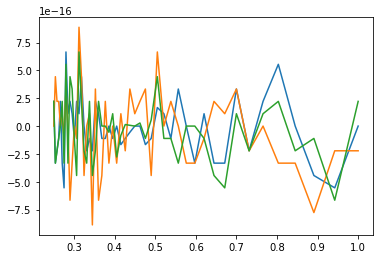

In [20]:
# check
n = 16
m = 6

T = np.linspace(1,4)
K = 1/T
Z1 = np.zeros_like(K)
Z2 = np.zeros_like(K)
Z3 = np.zeros_like(K)
Z4 = np.zeros_like(K)

Z2_Z1 = np.zeros_like(K)
Z3_Z1 = np.zeros_like(K)
Z4_Z1 = np.zeros_like(K)

for i, k in enumerate(K):
    gamma = eval_gamma(k, n)
    Z1[i] = eval_Z1(k, n, m, gamma)
    Z2[i] = eval_Z2(k, n, m, gamma)
    Z3[i] = eval_Z3(k, n, m, gamma)
    Z4[i] = eval_Z4(k, n, m, gamma)    
    
    Z2_Z1[i] = eval_Z2_over_Z1(K, n, m, gamma)
    Z3_Z1[i] = eval_Z3_over_Z1(K, n, m, gamma)
    Z4_Z1[i] = eval_Z4_over_Z1(K, n, m, gamma)

# print(Z2/Z1-Z2_Z1)
# print(Z3/Z1-Z3_Z1)
# print(Z4/Z1-Z4_Z1)
fig, ax = plt.subplots()

ax.plot(K, Z2/Z1-Z2_Z1)
ax.plot(K, Z3/Z1-Z3_Z1)
ax.plot(K, Z4/Z1-Z4_Z1)

### $Z^\prime_1/Z_1$

In [21]:
# ratio dZ1/Z1, etc
def eval_dZ1_over_Z1(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dZ1_over_Z1 = 0.0
    for r in range(n):
        dZ1_over_Z1 = dZ1_over_Z1 + d_gamma[2*r+1]*np.tanh(m*gamma[2*r+1]/2)
    dZ1_over_Z1 = dZ1_over_Z1 * m / 2
    return dZ1_over_Z1

def eval_dZ2_over_Z2(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dZ2_over_Z2 = 0.0
    for r in range(n):
        dZ2_over_Z2 = dZ2_over_Z2 + d_gamma[2*r+1]/np.tanh(m*gamma[2*r+1]/2)
    dZ2_over_Z2 = dZ2_over_Z2 * m / 2
    return dZ2_over_Z2

def eval_dZ3_over_Z3(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dZ3_over_Z3 = 0.0
    for r in range(n):
        dZ3_over_Z3 = dZ3_over_Z3 + d_gamma[2*r]*np.tanh(m*gamma[2*r]/2)
    dZ3_over_Z3 = dZ3_over_Z3 * m / 2
    return dZ3_over_Z3

def eval_dZ4_over_Z4(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dZ4_over_Z4 = 0.0
    for r in range(n):
        dZ4_over_Z4 = dZ4_over_Z4 + d_gamma[2*r]/np.tanh(m*gamma[2*r]/2)
    dZ4_over_Z4 = dZ4_over_Z4 * m / 2
    return dZ4_over_Z4


def All_dZ_over_Z1(K, n, m, gamma):
    Z2_over_Z1 = eval_Z2_over_Z1(K, n, m, gamma)
    Z3_over_Z1 = eval_Z3_over_Z1(K, n, m, gamma)
    Z4_over_Z1 = eval_Z4_over_Z1(K, n, m, gamma) 

    dZ1_over_Z1 = eval_dZ1_over_Z1(K, n, m, gamma)
    dZ2_over_Z2 = eval_dZ2_over_Z2(K, n, m, gamma)
    dZ3_over_Z3 = eval_dZ3_over_Z3(K, n, m, gamma)
    dZ4_over_Z4 = eval_dZ4_over_Z4(K, n, m, gamma)
    
    All_dZ_over_Z1 = dZ1_over_Z1 + dZ2_over_Z2*Z2_over_Z1 + dZ3_over_Z3*Z3_over_Z1 + dZ4_over_Z4*Z4_over_Z1
    return All_dZ_over_Z1

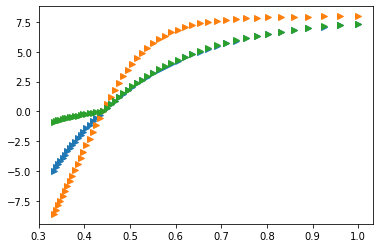

In [22]:
# check
n = 4
m = 2

T = np.linspace(1,3)
K = 1/T
Z1 = np.zeros_like(K)
Z2 = np.zeros_like(K)
Z3 = np.zeros_like(K)
Z4 = np.zeros_like(K)

dZ1_over_Z1 = np.zeros_like(K)
dZ2_over_Z2 = np.zeros_like(K)
dZ3_over_Z3 = np.zeros_like(K)
dZ4_over_Z4 = np.zeros_like(K)

for i, k in enumerate(K):
    gamma = eval_gamma(k, n)
    Z1[i] = eval_Z1(k, n, m, gamma)
    Z2[i] = eval_Z2(k, n, m, gamma)
    Z3[i] = eval_Z3(k, n, m, gamma)
    Z4[i] = eval_Z4(k, n, m, gamma)    
    dZ1_over_Z1[i] = eval_dZ1_over_Z1(k, n, m, gamma)
    dZ2_over_Z2[i] = eval_dZ2_over_Z2(k, n, m, gamma)
    dZ3_over_Z3[i] = eval_dZ3_over_Z3(k, n, m, gamma)
    dZ4_over_Z4[i] = eval_dZ4_over_Z4(k, n, m, gamma)
        
fig, ax = plt.subplots()

# ax.plot(K, np.gradient(Z1, K), '<')
# ax.plot(K, dZ1_over_Z1*Z1, '>')

# ax.plot(K, np.gradient(Z2, K), '<')
# ax.plot(K, dZ2_over_Z2*Z2, '>')

# ax.plot(K, np.gradient(Z3, K), '<')
# ax.plot(K, dZ3_over_Z3*Z3, '>')

# ax.plot(K, np.gradient(Z4, K), '<')
# ax.plot(K, dZ4_over_Z4*Z4, '>')

ax.plot(K, dZ1_over_Z1, '>')
ax.plot(K, dZ2_over_Z2, '>')
ax.plot(K, dZ3_over_Z3, '>')
# ax.plot(K, dZ4_over_Z4, '>')

# ax.plot(K, np.gradient(Z1, K)-dZ1_over_Z1*Z1, '<')
# ax.plot(K, np.gradient(Z2, K)-dZ2_over_Z2*Z2, '>')
# ax.plot(K, np.gradient(Z3, K)-dZ3_over_Z3*Z3, 'x')
# ax.plot(K, np.gradient(Z4, K)-dZ4_over_Z4*Z4, '+')


### $Z^{\prime\prime}_1/Z_1$

In [23]:
# ratio ddZ1/Z1, etc
def eval_ddZ1_over_Z1(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ1_over_Z1 = 0.0
    for r in range(n):
        ddZ1_over_Z1 = ddZ1_over_Z1 + d_gamma[2*r+1]*np.tanh(m*gamma[2*r+1]/2)
    ddZ1_over_Z1 = ddZ1_over_Z1 * m / 2
    ddZ1_over_Z1 = ddZ1_over_Z1**2
    
    for r in range(n):
        ddZ1_over_Z1 = ddZ1_over_Z1 + (dd_gamma[2*r+1]*np.tanh(m*gamma[2*r+1]/2) + ((d_gamma[2*r+1]/np.cosh(m*gamma[2*r+1]/2))**2) * m/2) * m/2
    return ddZ1_over_Z1

def eval_ddZ2_over_Z2(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ2_over_Z2 = 0.0
    for r in range(n):
        ddZ2_over_Z2 = ddZ2_over_Z2 + d_gamma[2*r+1]/np.tanh(m*gamma[2*r+1]/2)
        
    ddZ2_over_Z2 = ddZ2_over_Z2 * m / 2
    ddZ2_over_Z2 = ddZ2_over_Z2**2

    for r in range(n):
        ddZ2_over_Z2 = ddZ2_over_Z2 + (dd_gamma[2*r+1]/np.tanh(m*gamma[2*r+1]/2) - ((d_gamma[2*r+1]/np.sinh(m*gamma[2*r+1]/2))**2) * m/2) * m/2
    return ddZ2_over_Z2

def eval_ddZ3_over_Z3(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ3_over_Z3 = 0.0
    for r in range(n):
        ddZ3_over_Z3 = ddZ3_over_Z3 + d_gamma[2*r]*np.tanh(m*gamma[2*r]/2)
    ddZ3_over_Z3 = ddZ3_over_Z3 * m / 2
    ddZ3_over_Z3 = ddZ3_over_Z3**2
    
    for r in range(n):
        ddZ3_over_Z3 = ddZ3_over_Z3 + (dd_gamma[2*r]*np.tanh(m*gamma[2*r]/2) + ((d_gamma[2*r]/np.cosh(m*gamma[2*r]/2))**2) * m/2) * m/2        
    return ddZ3_over_Z3


def eval_ddZ4_over_Z4(K, n, m, gamma):
    gamma = eval_gamma(K, n)
    d_gamma = eval_d_gamma(K, n)
    dd_gamma = eval_dd_gamma(K, n)

    ddZ4_over_Z4 = 0.0    
#     for r in range(n):
#         ddZ4_over_Z4 = ddZ4_over_Z4 + d_gamma[2*r]/np.tanh(m*gamma[2*r]/2)
#     ddZ4_over_Z4 = ddZ4_over_Z4 * m / 2
#     ddZ4_over_Z4 = ddZ4_over_Z4**2
    
    for r in range(n):
        ddZ4_over_Z4 = ddZ4_over_Z4 + (dd_gamma[2*r]/np.tanh(m*gamma[2*r]/2) - ((d_gamma[2*r+1]/np.sinh(m*gamma[2*r]/2))**2) * m/2) * m/2
    return ddZ4_over_Z4

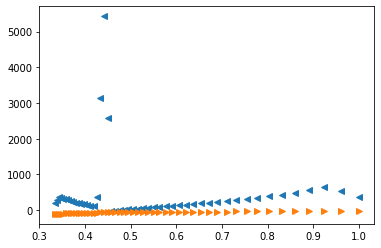

In [24]:
# check
n = 2
m = 2

T = np.linspace(1,3)
K = 1/T

Z1 = np.zeros_like(K)
Z2 = np.zeros_like(K)
Z3 = np.zeros_like(K)
Z4 = np.zeros_like(K)

# dZ1_over_Z1 = np.zeros_like(K)
# dZ2_over_Z2 = np.zeros_like(K)
# dZ3_over_Z3 = np.zeros_like(K)
dZ4_over_Z4 = np.zeros_like(K)

ddZ1_over_Z1 = np.zeros_like(K)
ddZ2_over_Z2 = np.zeros_like(K)
ddZ3_over_Z3 = np.zeros_like(K)
ddZ4_over_Z4 = np.zeros_like(K)

for i, k in enumerate(K):
    gamma = eval_gamma(k, n)
    
    Z1[i] = eval_Z1(k, n, m, gamma)
    Z2[i] = eval_Z2(k, n, m, gamma)
    Z3[i] = eval_Z3(k, n, m, gamma)
    Z4[i] = eval_Z4(k, n, m, gamma)    
    
#     dZ1_over_Z1[i] = eval_dZ1_over_Z1(k, n, m, gamma)
#     dZ2_over_Z2[i] = eval_dZ2_over_Z2(k, n, m, gamma)
#     dZ3_over_Z3[i] = eval_dZ3_over_Z3(k, n, m, gamma)
    dZ4_over_Z4[i] = eval_dZ4_over_Z4(k, n, m, gamma)
    
    ddZ1_over_Z1[i] = eval_ddZ1_over_Z1(k, n, m, gamma)
    ddZ2_over_Z2[i] = eval_ddZ2_over_Z2(k, n, m, gamma)
    ddZ3_over_Z3[i] = eval_ddZ3_over_Z3(k, n, m, gamma)
    ddZ4_over_Z4[i] = eval_ddZ4_over_Z4(k, n, m, gamma)
        
fig, ax = plt.subplots()

# ax.plot(K, np.gradient(np.gradient(Z1, K),K), '<')
# ax.plot(K, ddZ1_over_Z1*Z1, '>')

# ax.plot(K, np.gradient(np.gradient(Z2, K),K), '<')
# ax.plot(K, ddZ2_over_Z2*Z2, '>')

# ax.plot(K, np.gradient(np.gradient(Z3, K),K), '<')
# ax.plot(K, ddZ3_over_Z3*Z3, '>')

ax.plot(K, np.gradient(np.gradient(Z4, K),K), '<')
ax.plot(K, ddZ4_over_Z4*Z4, '>')

# ax.plot(K, np.gradient(Z1, K)-dZ1_over_Z1*Z1, '<')
# ax.plot(K, np.gradient(Z2, K)-dZ2_over_Z2*Z2, '>')
# ax.plot(K, np.gradient(Z3, K)-dZ3_over_Z3*Z3, 'x')
# ax.plot(K, np.gradient(Z4, K)-dZ4_over_Z4*Z4, '+')



### Partition function

In [25]:
# Z_nm: partition function and lnZ_nm: log of partition function
def Z_nm(K, n, m):
    gamma = eval_gamma(K, n)
    Z1 = eval_Z1(K, n, m, gamma)
    Z2 = eval_Z2(K, n, m, gamma)
    Z3 = eval_Z3(K, n, m, gamma)
    Z4 = eval_Z4(K, n, m, gamma)
    Z = 0.5 * (2*np.sinh(2*K))**(n*m/2) * (Z1+Z2+Z3+Z4)
    return Z

def lnZ_nm_bare(K, n, m):
    gamma = eval_gamma(K, n)
    Z1 = eval_Z1(K, n, m, gamma)
    Z2 = eval_Z2(K, n, m, gamma)
    Z3 = eval_Z3(K, n, m, gamma)
    Z4 = eval_Z4(K, n, m, gamma)
    lnZ = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + np.log(Z1+Z2+Z3+Z4)
    return lnZ  

# lnZ1
def eval_lnZ1(K, n, m, gamma):
    lnZ1 = 0.0
    for r in range(n):
        lnZ1 = lnZ1 + np.log(2*np.cosh(m*gamma[2*r+1]/2))
    return lnZ1

def lnZ_nm(K, n, m):
    gamma = eval_gamma(K, n)
    lnZ1 = eval_lnZ1(K, n, m, gamma)
#     Z2_over_Z1 = eval_Z2_over_Z1(K, n, m, gamma)
#     Z3_over_Z1 = eval_Z3_over_Z1(K, n, m, gamma)
#     Z4_over_Z1 = eval_Z4_over_Z1(K, n, m, gamma)    
#     lnZ = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + lnZ1 + np.log(1+Z2_over_Z1+Z3_over_Z1+Z4_over_Z1)
    lnZ = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + lnZ1 + np.log(All_Z_over_Z1(K, n, m, gamma))

    return lnZ  

In [26]:
# energy_per_site
def e_nm(K, n, m):
    gamma = eval_gamma(K, n)
    e_nm = -J/np.tanh(2*K) 
    e_nm = e_nm - J*(All_dZ_over_Z1(K, n, m, gamma))/(n*m*All_Z_over_Z1(K, n, m, gamma))
    return e_nm

In [27]:
steps = 402
T = np.linspace(1, 4, steps)
K = 1/T

ln_Z_shape = {}
E_shape = {}
EE_shape = {}
c_shape = {}

for n in [2,4,8,16,32,64]:
    m = n
    ln_Z = np.zeros(steps)
    eng = np.zeros(steps)
    
    for i in range(steps):
        ln_Z[i] = lnZ_nm(K[i], n, m)
        eng[i] = e_nm(K[i], n, m)
        
    dlnZ_dK = np.gradient(ln_Z, K)
    ddlnZ_ddK = np.gradient(dlnZ_dK, K)
    
    E_shape[(n,m)] = -J*dlnZ_dK/(n*m)
    EE_shape[(n,m)] = eng

    c_shape[(n,m)] = ddlnZ_ddK*(K**2)/(n*m)

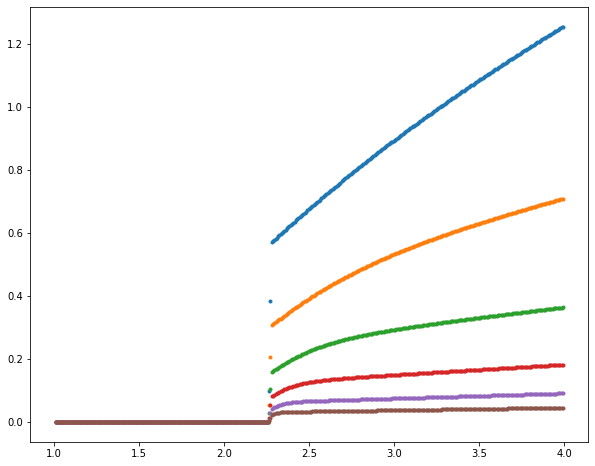

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
for n in [2,4,8,16,32,64]:
#     ax.plot(T, E_shape[(n,n)],'<')
#     ax.plot(T, EE_shape[(n,n)],'>')
    ax.plot(T[1:-1], E_shape[(n,n)][1:-1]-EE_shape[(n,n)][1:-1],'.')

ax.plot([Tc, Tc], [-1e-4, 1e-4], 'r-')

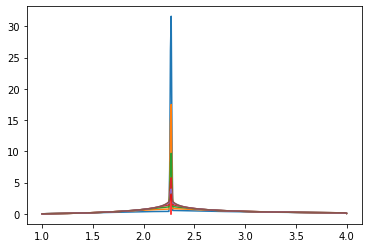

In [30]:
fig, ax = plt.subplots()
for n in [2,4,8,16,32,64]:
    ax.plot(T, c_shape[(n,n)])
ax.plot([Tc, Tc], [0, 3], 'r-')

In [31]:
K = 1/5
n = 128
m = n
gamma = eval_gamma(K, n)
# print(np.log(eval_Y1(K,n,m,gamma)))
# print(eval_Z1(K,n,m,gamma))
print(ln_Z_nxm_p(K, n, m))
print(lnZ_nm(K, n, m))

NameError: name 'ln_Z_nxm_p' is not defined

In [32]:
# lnZ_nm(1/5, 32, 32)
ln_Z_nxm_p(1/5, 32, 32)

NameError: name 'ln_Z_nxm_p' is not defined

In [33]:
K = 1/5
n = 32
m = n 
gamma = eval_gamma(K, n)
print(eval_Z1(K, n, m, gamma),eval_Z2(K, n, m, gamma),eval_Z3(K, n, m, gamma),eval_Z4(K, n, m, gamma))
print(eval_Y1(K, n, m, gamma),eval_Y2(K, n, m, gamma),eval_Y3(K, n, m, gamma),eval_Y4(K, n, m, gamma))

print(Z_nxm(K,2,2))
print(Z_nm(K,2,2))

inf inf inf inf


/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars


NameError: name 'eval_Y1' is not defined

In [34]:
Steps = 102
n = 128
m = 128
Z = np.zeros(Steps)
Z_new = np.zeros(Steps)
ln_Z = np.zeros(Steps)
ln_Z_new = np.zeros(Steps)
T = np.linspace(1, 5, Steps)
K = 1/T
for i in range(Steps):
#     print(i, K[i])
#     Z[i] = Z_nxm(K[i], n, m)
#     ln_Z[i] = np.log(Z[i])
    ln_Z[i] = ln_Z_nxm_p(K[i], n, m)
#     Z_new[i] = Z_nm(K[i], n, m)
    ln_Z_new[i] = lnZ_nm(K[i], n, m)

# print(np.log(Z))

dlnZ_dK = np.gradient(ln_Z, K)
dlnZ_dK_new = np.gradient(ln_Z_new, K)
# ddlnZ_ddK = np.gradient(dlnZ_dK, K)

fig, ax = plt.subplots()
ax.plot(T, -J*dlnZ_dK/(n*m), '.')
ax.plot(T, -J*dlnZ_dK_new/(n*m), 'X')
ax.plot([Tc, Tc], [-2, -0.4], 'r-')
# ax.set_xlim([1,4])

NameError: name 'ln_Z_nxm_p' is not defined

## First version

In [35]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))

In [36]:
def eval_gamma(K, n):
    gamma = np.zeros(2*n)
    gamma[0] = 2*K + np.log(np.tanh(K))
    for q in range(1, 2*n):
        gamma[q] = np.arccosh(np.cosh(2*K)**2/np.sinh(2*K)-np.cos(np.pi*q/n))
    return gamma

In [37]:
def eval_Y1(K, n, m, gamma):
    Y1 = 1.0
    for q in range(n):
        Y1 = Y1*2*np.cosh(m*gamma[2*q+1]/2)
    return Y1

def eval_Y2(K, n, m, gamma):
    Y2 = 1.0
    for q in range(n):
        Y2 = Y2*2*np.sinh(m*gamma[2*q+1]/2)
    return Y2

def eval_Y3(K, n, m, gamma):
    Y3 = 1.0
    for q in range(n):
        Y3 = Y3*2*np.cosh(m*gamma[2*q]/2)
    return Y3

def eval_Y4(K, n, m, gamma):
    Y4 = 1.0
    for q in range(n):
        Y4 = Y4*2*np.sinh(m*gamma[2*q]/2)
    return Y4

In [38]:
def eval_ln_Y1(K, n, m, gamma):
    ln_Y1 = 0.0
    for q in range(n):
        ln_Y1 = ln_Y1 + np.log(2*np.cosh(m*gamma[2*q+1]/2))
    return ln_Y1

def eval_Y2_Y1(K, n, m, gamma):
    Y2_Y1 = 1.0
    for q in range(n):
        Y2_Y1 = Y2_Y1 * np.sinh(m*gamma[2*q+1]/2) / np.cosh(m*gamma[2*q+1]/2)
    return Y2_Y1

def eval_Y3_Y1(K, n, m, gamma):
    Y3_Y1 = 1.0
    for q in range(n):
        Y3_Y1 = Y3_Y1 * np.cosh(m*gamma[2*q]/2) / np.cosh(m*gamma[2*q+1]/2)
    return Y3_Y1

def eval_Y4_Y1(K, n, m, gamma):
    Y4_Y1 = 1.0
    for q in range(n):
        Y4_Y1 = Y4_Y1 * np.sinh(m*gamma[2*q]/2) / np.cosh(m*gamma[2*q+1]/2)
    return Y4_Y1

In [39]:
def Z_nxm(K, n, m):
    gamma = eval_gamma(K, n)
    Y1 = eval_Y1(K, n, m, gamma)
    Y2 = eval_Y2(K, n, m, gamma)
    Y3 = eval_Y3(K, n, m, gamma)
    Y4 = eval_Y4(K, n, m, gamma)
    Z = 0.5*(2*np.sinh(2*K))**(n*m/2)*(Y1+Y2+Y3+Y4)
    return Z

def ln_Z_nxm(K, n, m):
    gamma = eval_gamma(K, n)
    Y1 = eval_Y1(K, n, m, gamma)
    Y2 = eval_Y2(K, n, m, gamma)
    Y3 = eval_Y3(K, n, m, gamma)
    Y4 = eval_Y4(K, n, m, gamma)
    ln_Z = np.log(0.5) + (n*m/2)*np.log((2*np.sinh(2*K))) + np.log(Y1+Y2+Y3+Y4)
    return ln_Z

def ln_Z_nxm_p(K, n, m):
    gamma = eval_gamma(K, n)
    ln_Y1 = eval_ln_Y1(K, n, m, gamma)
    Y2_Y1 = eval_Y2_Y1(K, n, m, gamma)
    Y3_Y1 = eval_Y3_Y1(K, n, m, gamma)
    Y4_Y1 = eval_Y4_Y1(K, n, m, gamma)
    ln_Z = np.log(0.5) + (0.5*n*m)*np.log((2*np.sinh(2*K))) + ln_Y1 + np.log(1+Y2_Y1+Y3_Y1+Y4_Y1)
    return ln_Z

In [40]:
def exact_2x2(beta):
    Z = 2*np.exp(8*beta)+12+2*np.exp(-8*beta)
    F = -np.log(Z)/beta
    E = -(2*8*np.exp(8*beta)+2*(-8)*np.exp(-8*beta))/Z
    E_sqr = (2*64*np.exp(8*beta) +2*64*np.exp(-8*beta))/Z
    C = (E_sqr-E*E)*(beta*beta)
    M_abs = (2*4*np.exp(8*beta)+8*2)/Z
    M_sqr = (2*16*np.exp(8*beta)+8*4)/Z
    chi_p = (M_sqr-M_abs*M_abs)*beta
    
    return Z, F, E, E_sqr, C, M_abs, M_sqr, chi_p

In [41]:
print(np.log(Z_nxm(1, 2, 2)))
print(ln_Z_nxm(1,2,2))
print(ln_Z_nxm_p(1,2,2))
print(exact_2x2(1))

8.695158045717331
8.695158045717331
8.695158045717331
(5973.916645008712, -8.695158045717331, -7.98392834374676, 63.87144112554003, 0.12832932745715198, 3.9946429309943987, 15.973215104208428, 0.016042958064907964)


In [42]:
print(Z_nxm(1, 2, 2))
print(exact_2x2(1))

5973.916645008712
(5973.916645008712, -8.695158045717331, -7.98392834374676, 63.87144112554003, 0.12832932745715198, 3.9946429309943987, 15.973215104208428, 0.016042958064907964)


In [43]:
K =1
n = 2
gamma = eval_gamma(K, n)
print(eval_Y1(K, n, n, gamma))
print(eval_Y1(K, n, n, gamma))

60.920552991385286
60.920552991385286


In [44]:
steps = 102
T = np.linspace(1, 4, steps)
K = 1/T

ln_Z_shape = {}
E_shape = {}
c_shape = {}

for n in [2,4,8,16,32,64]:
    m = n
    ln_Z = np.zeros(steps)
    for i in range(steps):
        ln_Z[i] = ln_Z_nxm_p(K[i], n, m)
    dlnZ_dK = np.gradient(ln_Z, K)
    ddlnZ_ddK = np.gradient(dlnZ_dK, K)
    E_shape[(n,m)] = -J*dlnZ_dK/(n*m)
    c_shape[(n,m)] = ddlnZ_ddK*(K**2)/(n*m)

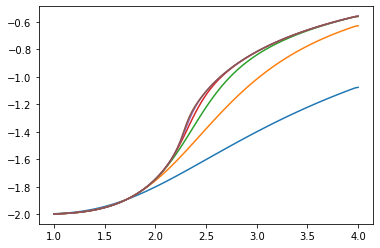

In [45]:
fig, ax = plt.subplots()
for n in [2,4,8,16,32,64]:
    ax.plot(T, E_shape[(n,n)])
# ax.plot([Tc, Tc], [-2, -0.4], 'r-')

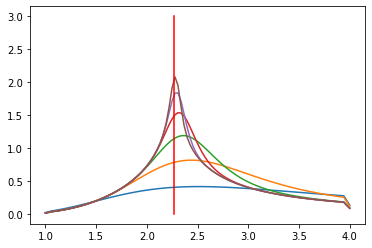

In [46]:
fig, ax = plt.subplots()
for n in [2,4,8,16,32,64]:
    ax.plot(T, c_shape[(n,n)])
ax.plot([Tc, Tc], [0, 3], 'r-')

In [47]:
Steps = 102
n = 16
m = 16
Z = np.zeros(Steps)
ln_Z = np.zeros(Steps)
T = np.linspace(1, 5, Steps)
K = 1/T
for i in range(Steps):
#     print(i, K[i])
    Z[i] = Z_nxm(K[i], n, m)
    ln_Z[i] = np.log(Z[i])
#     ln_Z[i] = ln_Z_nxm_p(K[i], n, m)
# print(np.log(Z))

dlnZ_dK = np.gradient(ln_Z, K)
ddlnZ_ddK = np.gradient(dlnZ_dK, K)

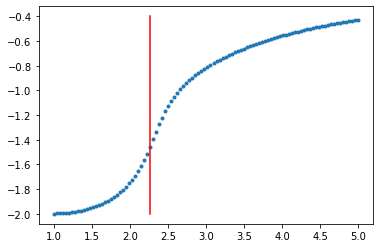

In [48]:
fig, ax = plt.subplots()
ax.plot(T, -J*dlnZ_dK/(n*m), '.')
ax.plot([Tc, Tc], [-2, -0.4], 'r-')
# ax.set_xlim([1,4])

(1, 4)

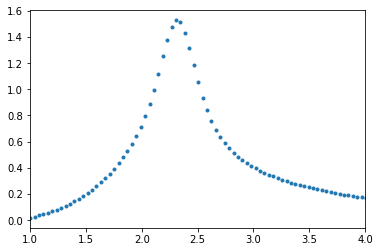

In [49]:
fig, ax = plt.subplots()
ax.plot(T, ddlnZ_ddK*(K**2)/(n*m), '.')
ax.set_xlim([1,4])

In [90]:
Steps = 400
dlnZ_dK = {}
ddlnZ_ddK = {}

T = np.linspace(2, 2.6, Steps)
K = 1/T

for n in [2,4,8,16,32,64,128]:
    m = n
    ln_Z = np.zeros(Steps)
    for i in range(Steps):
        ln_Z[i] = ln_Z_nxm_p(K[i], n, m)

    dlnZ_dK[n] = np.gradient(ln_Z, K)
    ddlnZ_ddK[n] = np.gradient(dlnZ_dK[n], K)
    

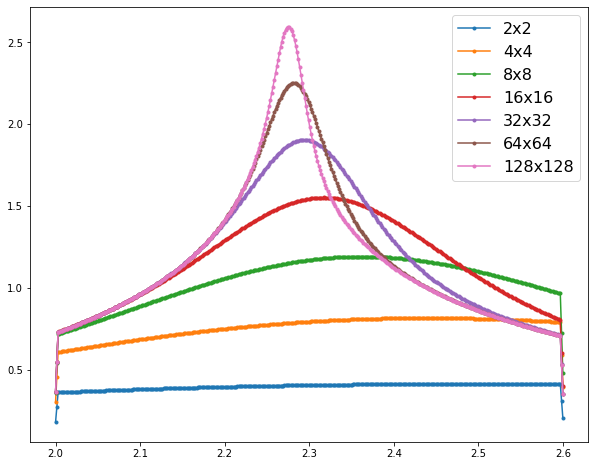

In [92]:
fig, ax = plt.subplots(figsize=(10,8))
for n in [2,4,8,16,32,64,128]:
    m = n
    ax.plot(T, ddlnZ_ddK[n]*K**2/(n*m), '.-', label='{}x{}'.format(n,m))

# ax.plot([Tc, Tc], [0,2.5],'r')
# ax.set_xlim([1,4])
# ax.set_ylim([-0.1, 2.5])
ax.legend(fontsize=16)
fig.savefig('FSS.png')

In [93]:
c_max = np.zeros(7)
K_max = np.zeros(7)

L = np.array([2,4,8,16,32,64,128])

for i, n in enumerate([2,4,8,16,32,64,128]):
    m = n
    c = ddlnZ_ddK[n]*K**2/(n*m)
    print(np.argmax(c),np.max(c))
    c_max[i] = np.max(c)
    K_max[i] = K[i]

340 0.4147781551146655
292 0.8164596954667386
241 1.1918299841300202
211 1.5521677078922935
195 1.9043076713920575
187 2.2516652440927984
183 2.5952458376756558


0.5216523435294086 0.08602320908101309


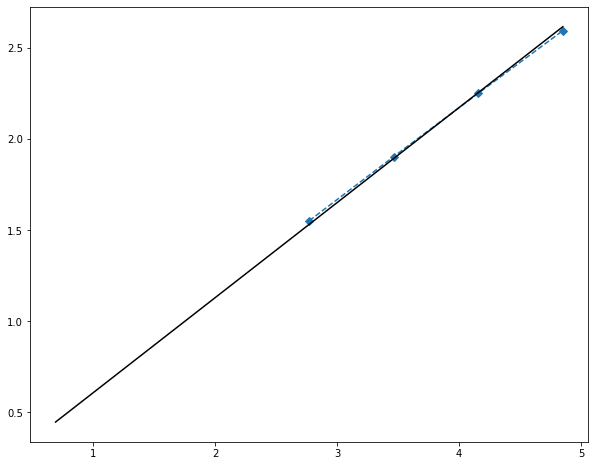

In [98]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(np.log(L[3:]), c_max[3:], 'D--')

m,b = np.polyfit(np.log(L), c_max, 1)    
print(m,b) 
ax.plot(np.log(L), b+m*np.log(L), 'k', label='slope={:.2f}'.format(m))

In [95]:
A0 = 8*Kc*Kc/np.pi

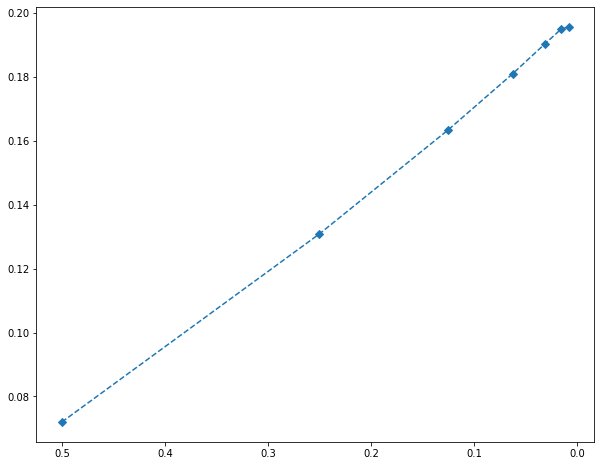

In [99]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(1/L, c_max-A0*np.log(L), 'D--')
ax.invert_xaxis()